<a href="https://colab.research.google.com/github/DreeeamBoard/MachineLearning/blob/main/HW1_Dongsu_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression problem (Boston housing dataset)
### build the regression models using linear regression, ridge, lasso, and support vector regression.  Try to optimize your models by adjusting hyper-parameters. 

## 1-0) Preparation

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# get Boston housing dataset
import warnings
with warnings.catch_warnings():
     # You should probably not use this dataset.
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True)

In [ ]:
# Let's look at how X and y look like
print("X.shape :", X.shape, "y.shape :",y.shape)

# Splitting data into train and test set - 8:2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=12)

X.shape : (506, 13) y.shape : (506,)


## 1-1) Linear regression

In [ ]:
# Apply StandardScaler through Pipeline
lin_reg = Pipeline([
                       ("scaler", StandardScaler()),
                       ("linear_reg", LinearRegression())
])

# Linear regression fit
lin_reg.fit(X_train, y_train)
y_test_predict = lin_reg.predict(X_test)

print("Test set MSE : ", np.round(mean_squared_error(y_test, y_test_predict),3))

Test set MSE :  20.558


## 1-2) Ridge regression

In [ ]:
# Apply StandardScaler through Pipeline
ridge_reg = Pipeline([
                      ("scaler", StandardScaler()),
                      ("ridge_reg", Ridge(alpha=1)) # First, let alpha = 1
])

# Ridge regression fit
ridge_reg.fit(X_train, y_train)
y_test_predict = ridge_reg.predict(X_test)

print("Test set MSE : ", np.round(mean_squared_error(y_test, y_test_predict),3))

Test set MSE :  20.536


## Let's look at how MSE changes as we tweak **alpha value**


when alpha is 0, Test set MSE : 20.558
when alpha is 0.0001, Test set MSE : 20.558
when alpha is 0.001, Test set MSE : 20.558
when alpha is 0.1, Test set MSE : 20.556
when alpha is 1, Test set MSE : 20.536
when alpha is 10, Test set MSE : 20.470
when alpha is 50, Test set MSE : 21.008


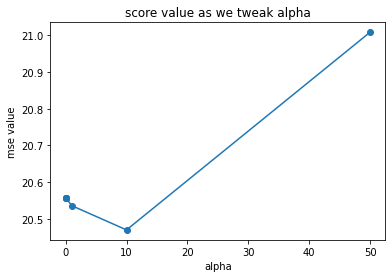

In [ ]:
alphas = [0, 0.0001, 0.001, 0.1, 1, 10, 50]
mse_score_list = []
for alpha in alphas :
  ridge_reg = Pipeline([
                      ("scaler", StandardScaler()),
                      ("ridge_reg", Ridge(alpha=alpha))
])
  ridge_reg.fit(X_train, y_train)

  y_test_predict = ridge_reg.predict(X_test)
  print("when alpha is {0}, Test set MSE : {1:.3f}".format(alpha, np.round(mean_squared_error(y_test, y_test_predict),3)))
  mse_score_list.append(np.round(mean_squared_error(y_test, y_test_predict),3)) # make mse value list
  
plt.plot(alphas, mse_score_list, marker='o')
plt.title('score value as we tweak alpha')
plt.xlabel('alpha')
plt.ylabel('mse value')
plt.show()

## Among the alpha values above, MSE is the lowest when alpha is 10

## 1-3) Lasso regression

In [ ]:
# Apply StandardScaler through Pipeline
lasso_reg = Pipeline([
           ("scaler", StandardScaler()),
           ("lasso_reg", Lasso(alpha=0.1)) # First, let alpha = 0.1
])

# Lasso regression fit
lasso_reg.fit(X_train, y_train)
y_test_predict = lasso_reg.predict(X_test)

print("Test set MSE : ", np.round(mean_squared_error(y_test, y_test_predict),3))

Test set MSE :  20.5


## Let's look at how MSE changes as we tweak alpha value


when alpha is 0, Test set MSE : 20.558
when alpha is 0.0001, Test set MSE : 20.557
when alpha is 0.001, Test set MSE : 20.552
when alpha is 0.1, Test set MSE : 20.500
when alpha is 1, Test set MSE : 26.962


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+03, tolerance: 3.434e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

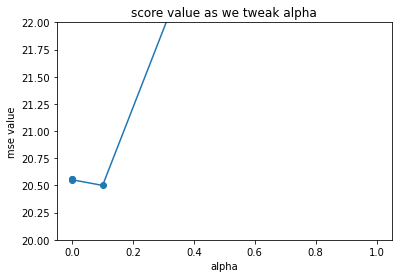

In [ ]:
alphas = [0, 0.0001, 0.001, 0.1, 1]
mse_score_list = []
for alpha in alphas :
  lasso_reg = Pipeline([
                      ("scaler", StandardScaler()),
                      ("lasso_reg", Lasso(alpha=alpha))
])
  lasso_reg.fit(X_train, y_train)

  y_test_predict = lasso_reg.predict(X_test)
  print("when alpha is {0}, Test set MSE : {1:.3f}".format(alpha, np.round(mean_squared_error(y_test, y_test_predict),3)))
  mse_score_list.append(np.round(mean_squared_error(y_test, y_test_predict),3)) # make mse value list
  
plt.plot(alphas, mse_score_list, marker='o')
plt.title('score value as we tweak alpha')
plt.xlabel('alpha')
plt.ylabel('mse value')
plt.ylim(20, 22)
plt.show()

## Among the alpha values above, MSE is the lowest when alpha is 0.1

## 1-4) Support vector regression

In [ ]:
from sklearn.svm import SVR

# Apply StandardScaler through Pipeline
sv_reg = Pipeline([
                   ("scaler", StandardScaler()),
                   ("support vector regression", SVR(kernel="poly", degree=2, C=100, epsilon=0.1)) # let C = 100
])

# Support vector regression fit
sv_reg.fit(X_train, y_train)
y_test_predict = sv_reg.predict(X_test)

print("Test set MSE : ", np.round(mean_squared_error(y_test, y_test_predict),3))

Test set MSE :  28.14


## Let's look at how MSE changes as we tweak C value

when C is 0.0001, Test set MSE : 87.402
when C is 0.001, Test set MSE : 87.213
when C is 0.1, Test set MSE : 70.947
when C is 1, Test set MSE : 31.670
when C is 10, Test set MSE : 25.662
when C is 50, Test set MSE : 27.424


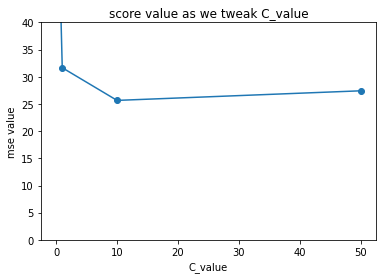

In [ ]:
C_values = [0.0001, 0.001, 0.1, 1, 10, 50]
mse_score_list = []

for C_value in C_values :
  sv_reg = Pipeline([
                   ("scaler", StandardScaler()),
                   ("support vector regression", SVR(kernel="poly", degree=2, C=C_value, epsilon=0.1))
])
  sv_reg.fit(X_train, y_train)

  y_test_predict = sv_reg.predict(X_test)
  print("when C is {0}, Test set MSE : {1:.3f}".format(C_value, np.round(mean_squared_error(y_test, y_test_predict),3)))
  mse_score_list.append(np.round(mean_squared_error(y_test, y_test_predict),3)) # make mse value list
  
plt.plot(C_values, mse_score_list, marker='o')
plt.title('score value as we tweak C_value')
plt.xlabel('C_value')
plt.ylabel('mse value')
plt.ylim(0, 40)
plt.show()

## Among the C values above, MSE is the lowest when C is 10

# 2. Classification problem (Breast cancer dataset)
#### build the classification models using logistic regression, linear svm, and svm with kernels.  Try to optimize your models by adjusting hyper-parameters.
## 2-0) Preparation

In [ ]:
# get Breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
# Let's look at how X and y look like
print("X.shape :", X.shape, "y.shape :",y.shape)

# Splitting data into train and test set - 8:2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=12)

X.shape : (569, 30) y.shape : (569,)


## 2-1) Logistic regression


In [ ]:
# Apply StandardScaler through Pipeline
log_reg = Pipeline([
           ("scaler", StandardScaler()),
           ("logistic_reg", LogisticRegression())
])

# Logistic regression fit
log_reg.fit(X_train, y_train)
y_test_predict = log_reg.predict(X_test)


print("Test set accuracy score : ", np.round(accuracy_score(y_test, y_test_predict),3))
print("Test set roc_auc_score : ", np.round(roc_auc_score(y_test, y_test_predict),3))

Test set accuracy score :  0.974
Test set roc_auc_score :  0.969


## 2-2) Linear svm

In [ ]:
from sklearn.svm import LinearSVC

# Apply StandardScaler through Pipeline
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge")) # let C = 1
])

# Linear svm fit
svm_clf.fit(X_train, y_train)
y_test_predict = svm_clf.predict(X_test)

print("Test set accuracy score : ", np.round(accuracy_score(y_test, y_test_predict),3))
print("Test set roc_auc_score : ", np.round(roc_auc_score(y_test, y_test_predict),3))

Test set accuracy score :  0.965
Test set roc_auc_score :  0.958


## Let's look at how score value changes as we tweak C value


when C is 0.0001, Test set accuracy score : 0.939, roc_auc_score : 0.936
when C is 0.001, Test set accuracy score : 0.965, roc_auc_score : 0.958
when C is 0.1, Test set accuracy score : 0.965, roc_auc_score : 0.958
when C is 1, Test set accuracy score : 0.965, roc_auc_score : 0.958


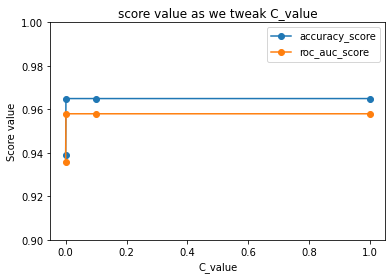

In [ ]:
C_values = [0.0001, 0.001, 0.1, 1]

# for visualization
accuracy_score_list = []
roc_auc_score_list = []

for C_value in C_values :
  svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=C_value, loss="hinge"))
])
  svm_clf.fit(X_train, y_train)

  y_test_predict = svm_clf.predict(X_test)
  print("when C is {0}, Test set accuracy score : {1:.3f}, roc_auc_score : {2:.3f}".format(C_value, np.round(accuracy_score(y_test, y_test_predict),3),np.round(roc_auc_score(y_test, y_test_predict),3)))
  accuracy_score_list.append(np.round(accuracy_score(y_test, y_test_predict),3)) # make accuracy_score value list
  roc_auc_score_list.append(np.round(roc_auc_score(y_test, y_test_predict),3)) # make roc_auc_score value list

plt.plot(C_values, accuracy_score_list, marker='o')
plt.plot(C_values, roc_auc_score_list, marker='o')
plt.title('score value as we tweak C_value')
plt.xlabel('C_value')
plt.ylabel('Score value')
plt.ylim(0.9, 1)
plt.legend(['accuracy_score', 'roc_auc_score'])
plt.show()

## Among the C values above, score is the highest when C is 0.001, 0.1 or 1

## 2-3) Svm with kernels

In [ ]:
# Apply StandardScaler through Pipeline
svm_kernels = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_with_kernels", SVC(kernel = "rbf", C = 0.001, gamma = 5)) # let C = 0.001 and gamma = 5
])

# SVM with kernerls fit
svm_kernels.fit(X_train, y_train)
y_test_predict = svm_kernels.predict(X_test)

print("Test set accuracy score : ", np.round(accuracy_score(y_test, y_test_predict),3))
print("Test set roc_auc_score : ", np.round(roc_auc_score(y_test, y_test_predict),3))

Test set accuracy score :  0.579
Test set roc_auc_score :  0.5


## Let's look at how score value changes as we tweak **C value**


when C is 0.0001, Test set accuracy score : 0.579, roc_auc_score : 0.500
when C is 0.001, Test set accuracy score : 0.579, roc_auc_score : 0.500
when C is 0.1, Test set accuracy score : 0.947, roc_auc_score : 0.938
when C is 1, Test set accuracy score : 0.956, roc_auc_score : 0.951
when C is 10, Test set accuracy score : 0.939, roc_auc_score : 0.933


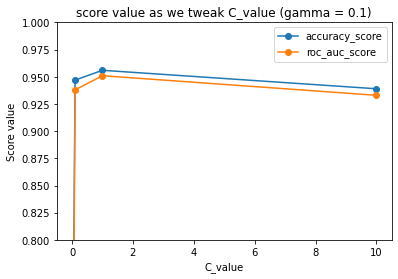

In [ ]:
C_values = [0.0001, 0.001, 0.1, 1, 10]

# for visualization
accuracy_score_list = []
roc_auc_score_list = []

for C_value in C_values :
  svm_kernels = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_with_kernels", SVC(kernel = "rbf", C = C_value, gamma = 0.1))
])
  svm_kernels.fit(X_train, y_train)

  y_test_predict = svm_kernels.predict(X_test)
  print("when C is {0}, Test set accuracy score : {1:.3f}, roc_auc_score : {2:.3f}".format(C_value, np.round(accuracy_score(y_test, y_test_predict),3),np.round(roc_auc_score(y_test, y_test_predict),3)))
  accuracy_score_list.append(np.round(accuracy_score(y_test, y_test_predict),3)) # make accuracy_score value list
  roc_auc_score_list.append(np.round(roc_auc_score(y_test, y_test_predict),3)) # make roc_auc_score value list

plt.plot(C_values, accuracy_score_list, marker='o')
plt.plot(C_values, roc_auc_score_list, marker='o')
plt.title('score value as we tweak C_value (gamma = 0.1)')
plt.xlabel('C_value')
plt.ylabel('Score value')
plt.ylim(0.8, 1)
plt.legend(['accuracy_score', 'roc_auc_score'])
plt.show()

## Among the C and gamma values above, score is the highest when C=1


## Now, let's look at how score value changes as we tweak **gamma value**


when gamma is 0.0001, Test set accuracy score : 0.754, roc_auc_score : 0.708
when gamma is 0.001, Test set accuracy score : 0.939, roc_auc_score : 0.927
when gamma is 0.1, Test set accuracy score : 0.956, roc_auc_score : 0.951
when gamma is 1, Test set accuracy score : 0.579, roc_auc_score : 0.500


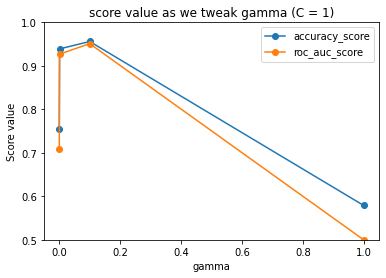

In [ ]:
gamma_values = [0.0001, 0.001, 0.1, 1]
# for visualization
accuracy_score_list = []
roc_auc_score_list = []

for gamma_value in gamma_values :
  svm_kernels = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_with_kernels", SVC(kernel = "rbf", C = 1, gamma = gamma_value))
])
  svm_kernels.fit(X_train, y_train)

  y_test_predict = svm_kernels.predict(X_test)
  print("when gamma is {0}, Test set accuracy score : {1:.3f}, roc_auc_score : {2:.3f}".format(gamma_value, np.round(accuracy_score(y_test, y_test_predict),3),np.round(roc_auc_score(y_test, y_test_predict),3)))
  accuracy_score_list.append(np.round(accuracy_score(y_test, y_test_predict),3)) # make accuracy_score value list
  roc_auc_score_list.append(np.round(roc_auc_score(y_test, y_test_predict),3)) # make roc_auc_score value list

plt.plot(gamma_values, accuracy_score_list, marker='o')
plt.plot(gamma_values, roc_auc_score_list, marker='o')
plt.title('score value as we tweak gamma (C = 1)')
plt.xlabel('gamma')
plt.ylabel('Score value')
plt.ylim(0.5, 1)
plt.legend(['accuracy_score', 'roc_auc_score'])
plt.show()

## Among the C and gamma values above, score is the highest when C=1 and gamma = 0.1